In [21]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import os
import seaborn as sns
from skimage.feature import hog

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
folder_path = "/content/drive/My Drive/Varsity College/2024 - Ice tasks/Ice task 1 dataset"


In [4]:
os.listdir(folder_path)

['(9) Nicolas Cage.jpeg',
 '(3) Nicolas Cage.jpeg',
 '(4) Nicolas Cage.jpeg',
 '(2) Nicolas Cage.jpeg',
 '(5) Nicolas Cage.jpeg',
 '(6) Nicolas Cage.jpeg',
 '(7) Nicolas Cage.jpeg',
 '(8) Nicolas Cage.jpeg',
 '(10) Nicolas Cage.jpeg',
 '(11) Nicolas Cage.jpeg',
 '(1) Other.jpeg',
 '(1) Nicolas Cage.jpeg',
 '(2) Other.jpeg',
 '(4) Other.jpeg',
 '(3) Other.jpeg',
 '(5) Other.jpeg',
 'data.csv',
 'Features_df.csv']

## Load the image locations into a csv and label the images

### Label 1 if the image description has Cage and 0 if not.
### This is for training task of the classifier.

In [5]:

data = []

for filename in os.listdir(folder_path):
    if filename.endswith(".jpeg"):
        if "Cage" in filename:
            label = 1
        elif "Other" in filename:
            label = 0

        file_path = os.path.join(folder_path, filename)        # Create the full file path
        data.append([file_path, label])                        # Add the file path and label to the data list

df = pd.DataFrame(data, columns=["file_path", "label"])         # Create a pandas DataFrame from the data list

csv_save_path = "/content/drive/My Drive/Varsity College/2024 - Ice tasks/Ice task 1 dataset"
csv_file = f"{csv_save_path}/data.csv"                         # Create a csv
csv_file = df.to_csv(csv_file, index=False)                    # Save data in the csv file


In [6]:
df



,file_path,label
0,/content/drive/My Drive/Varsity College/2024 -...,1
1,/content/drive/My Drive/Varsity College/2024 -...,1
2,/content/drive/My Drive/Varsity College/2024 -...,1
3,/content/drive/My Drive/Varsity College/2024 -...,1
4,/content/drive/My Drive/Varsity College/2024 -...,1
5,/content/drive/My Drive/Varsity College/2024 -...,1
6,/content/drive/My Drive/Varsity College/2024 -...,1
7,/content/drive/My Drive/Varsity College/2024 -...,1
8,/content/drive/My Drive/Varsity College/2024 -...,1
9,/content/drive/My Drive/Varsity College/2024 -...,1


## Feature selection

In [7]:
# List to store the features and labels
features = []
labels = []

In [8]:
# Load the Haar cascade classifier for face detection
# This already trained classifier will only take face objects on an image, and trace it out.
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [9]:
# Iterate through each image in the DataFrame
for index, row in df.iterrows():
    file_path = row['file_path']
    label = row['label']
    img = cv2.imread(file_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        # Crop the face from the image
        face_img = gray[y:y + h, x:x + w]

        # Extract features using HOG
        hog_features, hog_image = hog(face_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, feature_vector=True)

        # Add the features and label to the lists
        features.append(hog_features)
        labels.append(label)

In [10]:
# Create a DataFrame from the features and labels
features_df = pd.DataFrame(features)
labels_df = pd.Series(labels, name='label')

# Concatenate the features and labels into a single DataFrame
dataset_df = pd.concat([features_df, labels_df], axis=1)

csv_file = f"{csv_save_path}/Features_df.csv"                         # Create a csv
csv_file = dataset_df.to_csv(csv_file, index=False)              # Save data in the csv file

In [11]:
dataset_df

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,label
0,0.090911,0.000000,0.042856,0.031943,0.305322,0.031943,0.028571,0.000000,0.000000,0.305322,...,0.021986,0.0,0.012437,0.0,0.13851,0.102973,0.373516,0.019665,0.043228,1
1,0.320024,0.320024,0.281520,0.049108,0.035543,0.075532,0.054866,0.047440,0.233063,0.206320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.120353,0.112416,0.131652,0.103395,0.123927,0.017024,0.011416,0.011596,0.014822,0.414745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.014945,0.030191,0.022762,0.016474,0.034585,0.009882,0.014767,0.006716,0.007271,0.278756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0.326394,0.070634,0.079563,0.030686,0.215567,0.055703,0.048012,0.078613,0.138254,0.346473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,0.345590,0.156744,0.006853,0.000000,0.019426,0.000000,0.008090,0.034071,0.345590,0.345590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,0.335782,0.316175,0.073900,0.070743,0.197055,0.081798,0.002553,0.072433,0.125097,0.335782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,0.406278,0.056212,0.018640,0.000000,0.068547,0.058741,0.028460,0.062739,0.043181,0.406278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,0.149667,0.004857,0.086100,0.000000,0.008809,0.021393,0.000000,0.057880,0.015479,0.265610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,0.112884,0.107645,0.079782,0.046375,0.095394,0.034010,0.083865,0.162350,0.079017,0.471125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# Train the model on this high dimension data and test its performance

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve, auc

In [15]:
data = pd.read_csv('/content/drive/My Drive/Varsity College/2024 - Ice tasks/Ice task 1 dataset/Features_df.csv')

# Separate features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [16]:
print(X.isnull().sum().sum())
print(X.shape)


261576
(15, 22500)


In [17]:

# Drop columns with missing values
X = X.dropna(axis=1)

In [18]:
X.shape

(15, 324)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [20]:
# Create the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Test the model on the testing set
y_pred = knn.predict(X_train)
yTest_pred = knn.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred)
test_accuracy = accuracy_score(y_test, yTest_pred)


Accuracy score on training: 0.8333, on testing 0.6667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


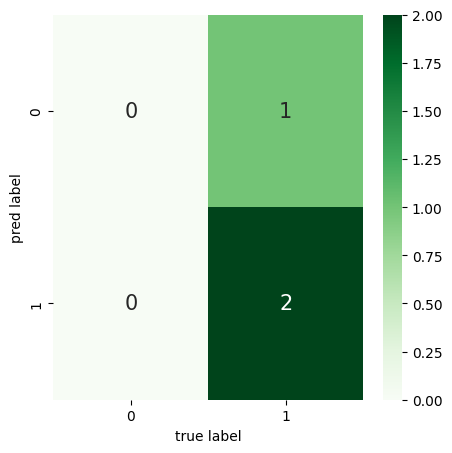

In [22]:
print(f"Accuracy score on training: {train_accuracy:.4f}, on testing {test_accuracy:.4f}")
print(classification_report(y_test, yTest_pred));

cm = confusion_matrix(y_test, yTest_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm.T, annot=True,
            annot_kws={"size": 15}, #changes the cell value
            cmap = "Greens",
            fmt = 'd'
            )
plt.xlabel('true label')
plt.ylabel('pred label')
plt.show();

## Dimensional reduction techniques for classification
## Principal Component Analysis was applied

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)  # Reduce the data to 100 dimensions (adjust as needed)
X_reduced = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

for k in range(1, 13):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_pred = knn.predict(X_train)
  test_pred = knn.predict(X_test)

  # Calculate accuracy

  train_accuracy = accuracy_score(y_train, train_pred)
  test_accuracy = accuracy_score(y_test, test_pred)

Accuracy score on training: 0.6667, on testing 1.0000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


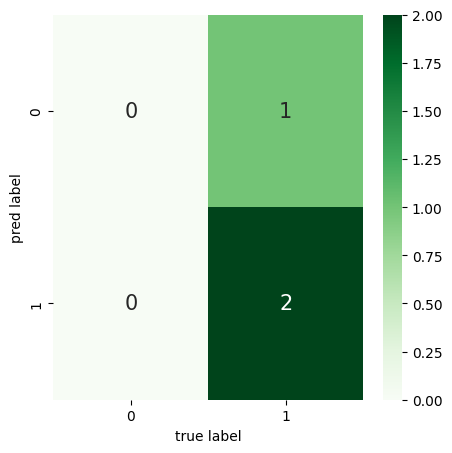

In [34]:
print(f"Accuracy score on training: {train_accuracy:.4f}, on testing {test_accuracy:.4f}")
print(classification_report(y_test, yTest_pred));

cm = confusion_matrix(y_test, yTest_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm.T, annot=True,
            annot_kws={"size": 15}, #changes the cell value
            cmap = "Greens",
            fmt = 'd'
            )
plt.xlabel('true label')
plt.ylabel('pred label')
plt.show();
